# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.19 which is incompatible.


In [2]:
!pip install baselines

    100% |████████████████████████████████| 133kB 5.3MB/s ta 0:00:01
  gym 0.9.6 does not provide the extra 'robotics'
    100% |████████████████████████████████| 2.5MB 10.1MB/s ta 0:00:01
  Installing build dependencies ... done
  Running setup.py bdist_wheel for baselines ... done
  Stored in directory: /root/.cache/pip/wheels/c3/95/d4/dc08613e714458fb368c44948025dade91a37db5932faa058f
  Running setup.py bdist_wheel for zmq ... done
  Stored in directory: /root/.cache/pip/wheels/44/7a/7d/ac1d865766b06f9769ac1154bf31dbb5abb3b52ecfe278247a
  Running setup.py bdist_wheel for mpi4py ... done
  Stored in directory: /root/.cache/pip/wheels/1c/16/e7/9ee2f86b64235d1e78497cc25c92f44aef70ae7348b2f8a1e7
Successfully built baselines zmq mpi4py


## import dependencies

In [3]:
import numpy as np
import torch
from unityagents import UnityEnvironment
from collections import deque
from Agent import Agent
from DQN import Epsilon
import matplotlib.pyplot as plt
%matplotlib inline

plt.ion()

The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [4]:
from unityagents import UnityEnvironment
import numpy as np

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")
#env = UnityEnvironment(file_name= "Banana_Windows_x86_64/Banana.exe" )

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [5]:
# get the default brain
brain_name = env.brain_names[0]
print(brain_name)
brain = env.brains[brain_name]
print(brain)

BananaBrain
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [6]:
###Hyperparameter####
hidden_layer1 = 37 * 2
hidden_layer2 = 37 * 2
eps_start = 0.1
eps_decay_rate = 0.995
eps_max_decay_to = 0.01
update_every = 4
buffer_size = 1000000
sample_batch_size = 64
gamma = 0.99
tau = 1e-3
learning_rate = 0.0006

In [7]:
episodes = 1000
input_size = 37
output_size = 4
agent = Agent(input_size, hidden_layer1, hidden_layer2, output_size, buffer_size, sample_batch_size, gamma, tau, learning_rate)
epsilon = Epsilon(eps_start, eps_decay_rate, eps_max_decay_to)
scores = deque(maxlen=100)

In [8]:
def dqn(episodes):
    scores = []
    scores_window = deque(maxlen=100)
    for episode in range(1, episodes+1):
        state = env.reset(train_mode=True)[brain_name].vector_observations[0]
        score = 0
        time = 0
        while True:
            current_epsilon = epsilon.eps_cal(time)
            action = agent.select_action(state, current_epsilon)
            env_info = env.step(action)[brain_name]
            next_state, reward, done = env_info.vector_observations[0], env_info.rewards[0], env_info.local_done[0]
            agent.add_to_buffer(state, action, reward, next_state, done)
            update_target = time % update_every == 0
            agent.learn(update_target)
            score += reward
            state = next_state
            time += 1
            if done:
                break
        scores_window.append(score)
        scores.append(score)
        mean_score = np.mean(scores)
        average_score = np.mean(scores_window)
        print('\rEpisode {} \tAverage score: {: .2f}'.format(episode, average_score), end="")
        if episode % 100 == 0:
            print('\rEpisode {} \tAverage score: {: .2f}'.format(episode, average_score))
            
        if average_score >= 13:      # check if environment is solved
            print('\nEnvironment solved in {: d} episodes!\tAverage Score: {: .2f}'.format(episode , average_score))
            agent.save_model()
            break
    return scores

## Train agent

In [9]:
scores = dqn(episodes)

Episode 100 	Average score:  1.71
Episode 200 	Average score:  3.69
Episode 300 	Average score:  9.39
Episode 380 	Average score:  13.06
Environment solved in  380 episodes!	Average Score:  13.06


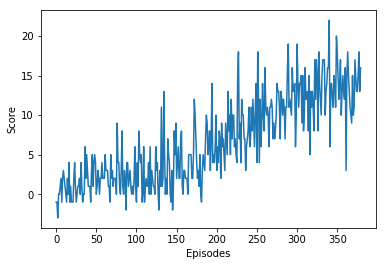

In [10]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episodes')
plt.show()

Choose the checkpoint to load as per the variant of DQN used. If the original DQN is used without any changes, load the checkpoint model.pth

In [11]:
agent.local_network.load_state_dict(torch.load('model.pth'))

## Test the agent

In [12]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0 # initialize the score
time = 0
while True:
    current_epsilon = epsilon.eps_cal(time)
    action = agent.select_action(state, current_epsilon) # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    time += 1
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 18.0


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [13]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 0.          1.          0.          0.          0.48619521  0.          0.
  0.          1.          0.          1.          0.          0.          0.
  0.51761949  1.          0.          0.          0.          0.23618992
  0.          0.          1.          0.          0.25689423  0.          0.
  1.          0.          0.24444792  0.          0.          1.          0.
  0.30087444  0.          0.        ]
States have length: 37


In [14]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 3.0


When finished, you can close the environment.

In [15]:
env.close()